In [22]:
#If opening in colab run this cell
!git clone https://github.com/bwolfson2/foster_in_dev
%cd foster_in_dev/Homeworks

Cloning into 'foster_in_dev'...
remote: Enumerating objects: 982, done.
remote: Counting objects: 100% (253/253), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 982 (delta 106), reused 173 (delta 68), pack-reused 729
Receiving objects: 100% (982/982), 274.62 MiB | 29.77 MiB/s, done.
Resolving deltas: 100% (432/432), done.
Checking out files: 100% (89/89), done.
/content/foster_in_dev/Homeworks/foster_in_dev/Homeworks


# IF OPENING IN COLAB, PLEASE REMEMBER TO SAVE THE NOTEBOOK TO YOUR GOOGLE DRIVE

To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_in_dev/blob/master/Homeworks/Homework%203.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

# Predicting Churn

After discussing the churn problem at TelCo with Henrietta for a while (remember, from your pre-class assignment?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. 

You've been authorized to give the retention offer to up to 25% of the customers whose contract is expiring. It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. The historical data includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

__1. Load the churn data. The code below will also transform your categorical variables into dummy variables. No points for this. This is just meant to help you get started.__

In [23]:
import numpy as np
import pandas as pd

# Just change the path below so that it points to your file.
data_path = "/content/foster_in_dev/Homeworks/data/data-hw3.csv" 

df = pd.read_csv(data_path)
df = pd.get_dummies(df, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

__2. Split the data into 80% training data and 20% test data.__

In [25]:
# Your code goes here
df_train, df_test = train_test_split(df, test_size=.25, random_state=42)

__3. Build the best model you can for each of the following three model types:__
- __A decision tree classifier. Try different values for the parameter min_samples_leaf.__
- __A logistic regression. Try different values for the parameter C.__
- __A third model of your choice. Some suggestions: KNN, SVM, etc. Try different paramater values for this one too.__

__Optimize in terms of their generalization performance using ROC Area and cross-validation with 10 folds. Remember to use only the training data (do not use the test data at all for this example). For each of these model types, you should report the best parameter value you found and the corresponding ROC Area in the cross-validation. Your code should also show the process you went through to try different complexity parameter(s) for each model type. Pick one model to move forward with. Why did you select this one?__

__HINT: There is an example below of the ROC Area for a DecisionTreeClassifier using cross validation.__  

In [26]:
# The code below is just meant as an example for you to compute the ROC Area using cross validation.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

target = "Churn_Yes"
predictors = df.columns[df.columns != target]
example_model = DecisionTreeClassifier()
# Remember to only use the training data here!!
avg_auc = cross_val_score(example_model, df_train[predictors], df_train[target], cv=10, scoring="roc_auc").mean()
print(avg_auc)

0.6647442320516557


In [27]:
# Your code goes here
ms_leafs = [0.001,1,10,100,1000,10000]
C = [1,100,10000,1000000,100000000]
leaf_size = [5,10,15,30,50,100]

In [28]:
for i in ms_leafs:
  example_model = DecisionTreeClassifier(min_samples_leaf=i)
  avg_auc = cross_val_score(example_model, df_train[predictors], df_train[target], cv=10, scoring="roc_auc").mean()
  print(avg_auc)


0.7640820689682204
0.6647471959326754
0.8010784745140122
0.8347997024302574
0.7336603844432142
0.5


In [29]:
for i in C:
  logit_df = []
  example_model = LogisticRegression(C=i, solver='liblinear')
  avg_auc = np.mean(cross_val_score(example_model, df_train[predictors], df_train[target], cv=10, scoring="roc_auc"))
  print(avg_auc)

0.8469710835118229
0.8468042199610071
0.8468244118988357
0.8468391012606139
0.8468189011313431


In [30]:
from sklearn.neighbors import KNeighborsClassifier

for i in leaf_size:
  example_model = KNeighborsClassifier(leaf_size=i)
  avg_auc = cross_val_score(example_model, df_train[predictors], df_train[target], cv=10, scoring="roc_auc").mean()
  print(avg_auc)

0.787743854963808
0.7879834665935164
0.7879834665935164
0.7877906651594093
0.787616568916418
0.7877572596734481


__4. Use your test data to plot the ROC Curves for each of the three best models you found in the previous question (make sure to plot the three curves together). Would you consider changing the selected model after looking at the curves? If yes, explain why. If not, explain what would the curves need to look like for you to consider changing the selected model.__

__HINT: There is an example below of the ROC curve for the DecisionTreeClassifier that was used earlier__

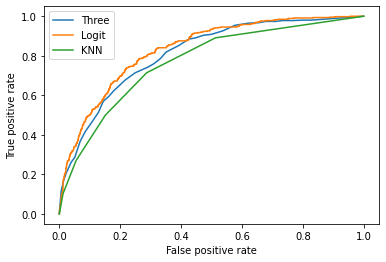

In [31]:
# The code below is just meant as an example for you to plot the ROC curve.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

three_model = DecisionTreeClassifier(min_samples_leaf=100)
logit_model = LogisticRegression(C=1, solver='liblinear')
knn_model = KNeighborsClassifier(leaf_size=10)

# Remember to use the training data here!! 
three_model.fit(df_train[predictors], df_train[target])
logit_model.fit(df_train[predictors], df_train[target])
knn_model.fit(df_train[predictors], df_train[target])
# And to use the test data here!!
probs_three = three_model.predict_proba(df_test[predictors])[:, 1]
probs_logit = logit_model.predict_proba(df_test[predictors])[:, 1]
probs_knn = knn_model.predict_proba(df_test[predictors])[:, 1]

fpr_three, tpr_three, thresholds_three = roc_curve(df_test[target], probs_three)
fpr_logit, tpr_logit, thresholds_logit = roc_curve(df_test[target], probs_logit)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(df_test[target], probs_knn)

plt.plot(fpr_three, tpr_three, label="Three")
plt.plot(fpr_logit, tpr_logit, label="Logit")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

In [32]:
# Your code goes here: I'll use the logit model since is the one with the higher AUC using the test data.

__5. What would be the potential benefit of stopping someone from leaving? HINT: Take a look at the description of the data and the retention offer.__

If one customers leaves, it means that the company will lose the revenue generated by those clients. Therefore, the company should have a retention strategy for those clients, but it have to be financially sustainable. In other words, the cost of this program should not be higher then the revenue retained.

__6. Split your training data into two sets, one with 90% of the data (the "sub-training" set) and another with 10% of the data (the validation set). Train the model you selected with the "sub-training" set, apply it to the validation set, and plot a profit curve by ranking customers according to their probability of churning. Make a recommendation of what people to target with the retention incentive according to this profit curve.__

In [33]:
# Your code goes here

df_subtrain, df_val = train_test_split(df_train, test_size=.10, random_state=42)

models = {"Logistic Regression": LogisticRegression(C=1, solver='liblinear'), 
          "Decision Tree": DecisionTreeClassifier(min_samples_leaf=100),
          "KNN": KNeighborsClassifier(leaf_size=10)}

In [ ]:
def build_cumulative_curve(model, scale=100):
    # Fit model
    model.fit(df_subtrain[predictors], df_subtrain[target])

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(df_val[predictors])[:, 1]

    # Sort theseprobabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probability_1)[::-1]
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(df_val[target])[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale

    df_val['predict'] = Y_test_probability_1
    df_val_order = df_val.sort_values(by='predict', ascending=False)
    revenue = df_val_order['MonthlyCharges'].where(df_val_order['Churn_Yes']==1)

    revenue_array = []
    revenue_array = np.array(revenue_array)

    for i in range(len(df_val['MonthlyCharges'])):
      test = revenue.head(i)
      test_array = np.array(test)
      revenue_one = test.sum() * 12
      revenue_array = np.append(revenue_array, revenue_one)

    return x_cumulative, y_cumulative, revenue_array

    
build_cumulative_curve(DecisionTreeClassifier(min_samples_leaf=100), scale=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

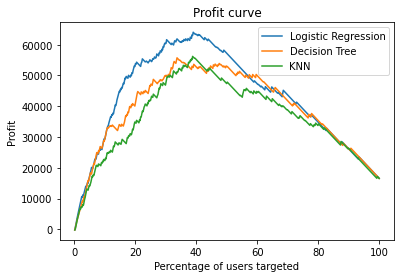

In [35]:
def plot_profit_curve(models):
    # Plot curve for each model
    total_obs = len(df_val[target])
    total_pos = df_val[target].sum()
    acum_revenue = []
    acum_cost = []
    for key in models:
        x_cumulative, y_cumulative, revenue_array = build_cumulative_curve(models[key], scale=1)
        profits = revenue_array - x_cumulative * total_obs * 200
        plt.plot(x_cumulative*100, profits, label=key)
    # Plot other details
    plt.xlabel("Percentage of users targeted")
    plt.ylabel("Profit")
    plt.title("Profit curve")
    plt.legend()
    
plot_profit_curve(models)

__7. Can you think of something better than ranking according to the probability of churning? If so, tell us what it is and plot a profit curve according to this new ranking. Compare the results of the new ranking with the results you got in the previous question. Are the results any better? Would your recommendation change?__

In [43]:
# Your code goes here

def build_cumulative_curve(model, scale=100):
    # Fit model
    model.fit(df_subtrain[predictors], df_subtrain[target])

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(df_val[predictors])[:, 1]

    # Sort theseprobabilities and the true value in descending order of probability
    order = np.argsort(df_val['MonthlyCharges'])[::-1]
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(df_val[target])[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale

    df_val['predict'] = Y_test_probability_1
    df_val_order = df_val.sort_values(by='MonthlyCharges', ascending=False)
    revenue = df_val_order['MonthlyCharges'].where(df_val_order['Churn_Yes']==1)

    revenue_array = []
    revenue_array = np.array(revenue_array)

    for i in range(len(df_val['MonthlyCharges'])):
      test = revenue.head(i)
      test_array = np.array(test)
      revenue_one = test.sum() * 12
      revenue_array = np.append(revenue_array, revenue_one)

    return x_cumulative, y_cumulative, revenue_array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

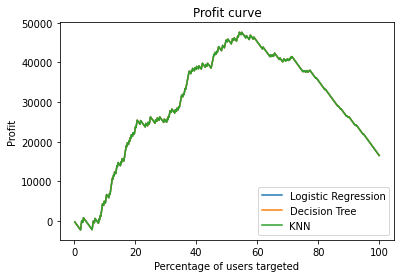

In [44]:
def plot_profit_curve(models):
    # Plot curve for each model
    total_obs = len(df_val[target])
    total_pos = df_val[target].sum()
    acum_revenue = []
    acum_cost = []
    for key in models:
        x_cumulative, y_cumulative, revenue_array = build_cumulative_curve(models[key], scale=1)
        profits = revenue_array - x_cumulative * total_obs * 200
        plt.plot(x_cumulative*100, profits, label=key)
    # Plot other details
    plt.xlabel("Percentage of users targeted")
    plt.ylabel("Profit")
    plt.title("Profit curve")
    plt.legend()
    
plot_profit_curve(models)

__8. Now the you have chosen a model and a threshold, it is time to evaluate 
the potential impact of your solution. Use the entire training data to train the model you selected, and then use the model on the test data to decide which customers to target with a retention offer. How much money do you estimate that your recommendation would have saved if we had given the retention offer to the customers in the test data?__

In [45]:
# Your code goes here

final_model = LogisticRegression(C=1, solver='liblinear').fit(df_train[predictors], df_train[target])
df_test['predictions'] = final_model.predict_proba(df_test[predictors])[:, 1]
order = np.argsort(df_test['predictions'])[::-1]
df_test = df_test.sort_values(by='predictions', ascending=False)
df_test

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,predictions
1971,1,1,93.55,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0.867622
1405,1,2,93.85,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0.866810
6359,1,2,94.00,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0.863273
3154,1,3,94.85,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0.858581
994,1,4,94.30,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0.858198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,0,71,19.85,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0.004760
1940,0,71,20.50,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0.004746
2333,0,72,19.95,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0.004460
530,0,70,20.05,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0.004216


In [46]:
#I choose 25% of the users target because it regresents the highest profit

df_test_25 = df_test.head(int(len(df_test)*(25/100)))
revenue = df_test_25['MonthlyCharges'].where(df_test_25['Churn_Yes']==1).dropna().sum() * 12
cost = int(len(df_test_25)) * 200
profit = revenue - cost
profit

165749.8